# Spread practice

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Samsung 2017-11-09 transaction data

In [10]:
# Read csv
data = pd.read_csv('2017-11-09_005930.csv', index_col = 0)

# 동시 호가 체결로 인한 데이터 왜곡 방지
data = data[1:]

# Let T = 30
T = 30

# Check column names
print(data.columns, '\n shape : ', data.shape)

Index(['close', 'contrast', 'sellprice', 'buyprice', 'volume', 'cum_vol',
       'cum_vol_price', 'open', 'high', 'low', 'contrast_sig', 'contrast_vol',
       'contrast_vol_price', 'tr_cost', 'mkt_cap', 'mkt_type', 'KO',
       'change_ratio', 'contrast_vol_ratio', 'vol_cycle', 'tr_str'],
      dtype='object') 
 shape :  (15871, 21)


### Quoted Spread

${ S }^{ Q } = \frac { 1 }{ T } \sum { ({ A }_{ t }-{ B }_{ t }) } $


In [11]:
data['QS'] = data['sellprice'] - data['buyprice']
data['QS'] = data['QS'].rolling(window = T, min_periods = 1).mean()

### Effective Spread

$ {S}^{E} = \frac { 1 }{T  } 2{Q}_{t}({P}_{t} - {M}_{t}) $

In [12]:
data['mid_t'] = (data['sellprice'] + data['buyprice'])/2
data['ES'] = 2 * np.sign(data['volume']) * (data['close'] - data['mid_t'])
data['ES'] = data['ES'].rolling(window = T, min_periods =1).mean()

### Realized Spread

$ {S}^{R} = \frac{1}{T} \sum {2{Q}_{t}({P}_{t} - {M}_{t+1})}  $

In [13]:
# Realized Spread
data['mid_t_1'] = data['mid_t']
data['mid_t_1'][:-1] = data['mid_t'][1:]
data['RS'] = 2 * np.sign(data['volume']) * (data['close'] - data['mid_t_1'])
data['RS'] = data['RS'].rolling(window = T, min_periods =1).mean() 


C:\Users\smile\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot three spreads

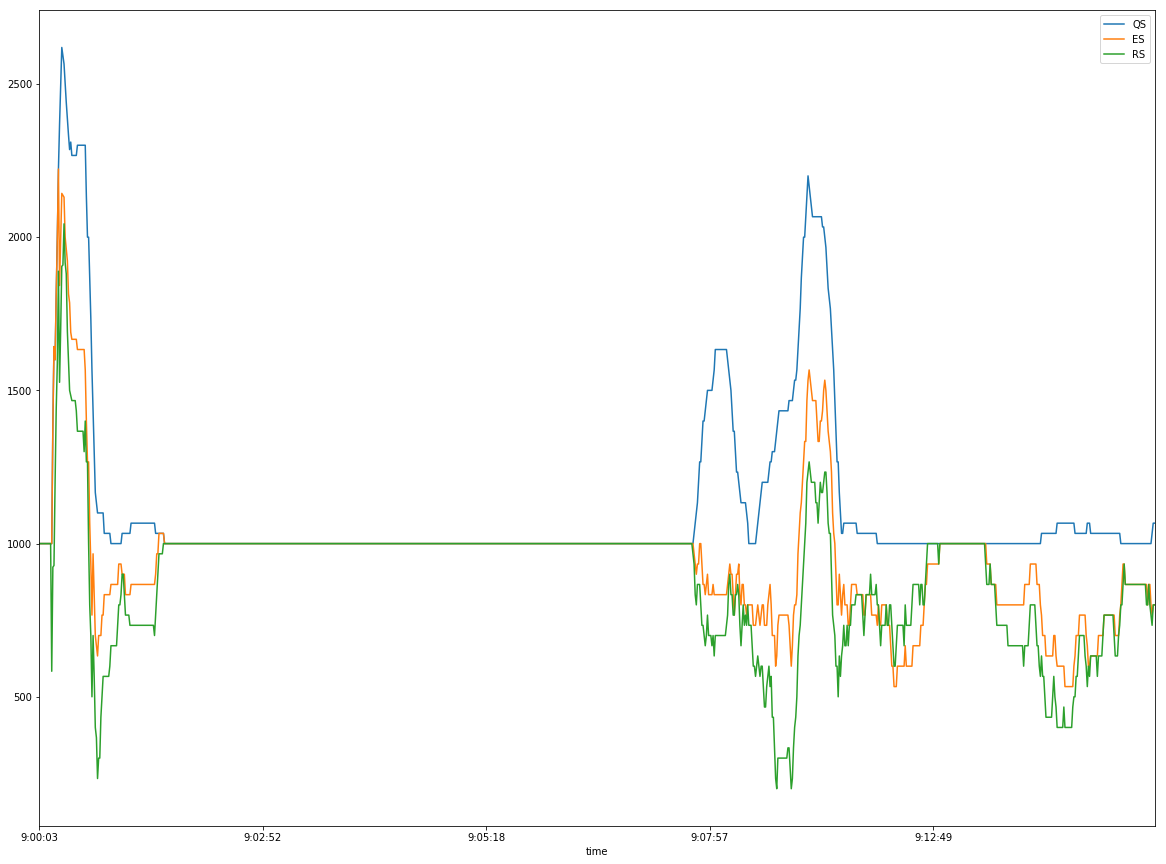

In [25]:
data[['QS','ES','RS']][:1000].plot(figsize=(20,15), legend = True)
plt.show()